In [30]:
import pandas as pd
import re
from rouge_score import rouge_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_excel('commit-messages-eval.xlsx')

model_msgs = df['model'].astype(str)
human_msgs_concise = df['human - concise'].astype(str)
human_msgs_extended = df['human - extended'].astype(str)

#clean up model messages as they all start with programming language and unnecessary info.
df['model'] = df['model'].apply(lambda x: re.sub(r'^.*?:\s*', '', str(x)))

In [82]:
# Initialize scorer with ROUGE-1, ROUGE-2, and ROUGE-L
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

rouge1_concise_scores = []
rouge2_concise_scores = []
rougeL_concise_scores = []

rouge1_extended_scores = []
rouge2_extended_scores = []
rougeL_extended_scores = []

for model, human in zip(model_msgs, human_msgs_concise):
    scores = scorer.score(human, model)
    rouge1_concise_scores.append(scores['rouge1'].fmeasure)
    rouge2_concise_scores.append(scores['rouge2'].fmeasure)
    rougeL_concise_scores.append(scores['rougeL'].fmeasure)

for model, human in zip(model_msgs, human_msgs_extended):
    scores = scorer.score(human, model)
    rouge1_extended_scores.append(scores['rouge1'].fmeasure)
    rouge2_extended_scores.append(scores['rouge2'].fmeasure)
    rougeL_extended_scores.append(scores['rougeL'].fmeasure)

print(f"Average concise ROUGE-1 F1: {np.mean(rouge1_concise_scores):.4f}")
print(f"Average concise ROUGE-2 F1: {np.mean(rouge2_concise_scores):.4f}")
print(f"Average concise ROUGE-L F1: {np.mean(rougeL_concise_scores):.4f}")

print(f"Average extended ROUGE-1 F1: {np.mean(rouge1_extended_scores):.4f}")
print(f"Average extended ROUGE-2 F1: {np.mean(rouge2_extended_scores):.4f}")
print(f"Average extended ROUGE-L F1: {np.mean(rougeL_extended_scores):.4f}")

Average concise ROUGE-1 F1: 0.1894
Average concise ROUGE-2 F1: 0.0242
Average concise ROUGE-L F1: 0.1758
Average extended ROUGE-1 F1: 0.1928
Average extended ROUGE-2 F1: 0.0434
Average extended ROUGE-L F1: 0.1572


In [83]:
df['concise msg ROUGE-1'] = rouge1_concise_scores
df['concise msg ROUGE-2'] = rouge2_concise_scores
df['concise msg ROUGE-L'] = rougeL_concise_scores

df['extended msg ROUGE-1'] = rouge1_extended_scores
df['extended msg ROUGE-2'] = rouge2_extended_scores
df['extended msg ROUGE-L'] = rougeL_extended_scores
# Save to Excel or CSV
df.to_excel('commit_message_rouge_scores.xlsx', index=False)


In [31]:

# model_names = ['Model 1', 'Model 2', 'Model 3']  # Replace with your model names

# # X-axis positions for the models

# # Create a plot
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plotting ROUGE-1, ROUGE-2, and ROUGE-L scores
# ax.bar(x - 0.2, rouge1_concise_scores, 0.2, label='ROUGE-1', color='blue')
# ax.bar(x, rouge2_concise_scores, 0.2, label='ROUGE-2', color='green')
# ax.bar(x + 0.2, rougeL_concise_scores, 0.2, label='ROUGE-L', color='orange')

# # Adding labels and title
# ax.set_xlabel('Models')
# ax.set_ylabel('Scores')
# ax.set_title('Comparison of ROUGE Scores by Model')
# ax.set_xticks(x)
# ax.set_xticklabels(model_names)
# ax.legend()

# # Show the plot
# plt.tight_layout()
# plt.show()


In [87]:
df['test_type'] = df['test_name'].str.extract(r'^(bug_fix|doc_update|feature_addition|refactor)')
java_tests = df[df['test_language']=='java'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]
python_tests = df[df['test_language']=='python'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]
javascript_tests = df[df['test_language']=='javascript'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]

In [91]:
# df

In [90]:
java_tests.head()
# python_tests['test_language'].iloc[0]
# javascript_tests['test_language'].iloc[0]

,test_name,test_type,test_language,concise msg ROUGE-1,concise msg ROUGE-2,concise msg ROUGE-L,extended msg ROUGE-1,extended msg ROUGE-2,extended msg ROUGE-L
0,bug_fix_1,bug_fix,java,0.300000,0.0,0.200000,0.212766,0.133333,0.212766
1,bug_fix_2,bug_fix,java,0.272727,0.1,0.272727,0.133333,0.046512,0.133333
2,bug_fix_3,bug_fix,java,0.454545,0.2,0.454545,0.322581,0.137931,0.258065
3,bug_fix_4,bug_fix,java,0.166667,0.0,0.166667,0.260870,0.181818,0.260870
4,bug_fix_5,bug_fix,java,0.173913,0.0,0.173913,0.111111,0.000000,0.111111


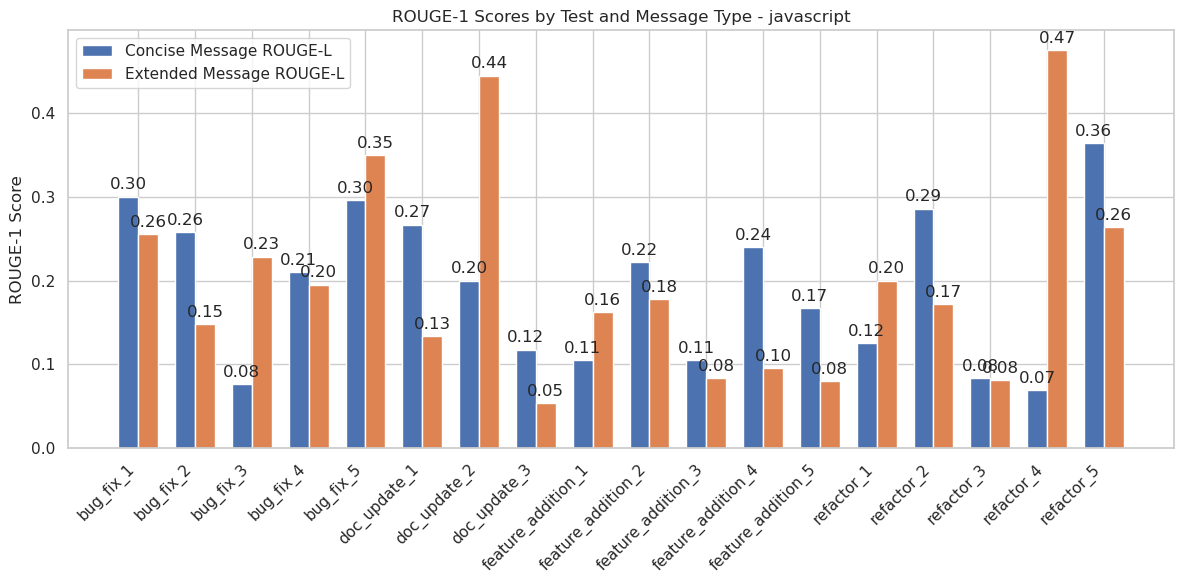

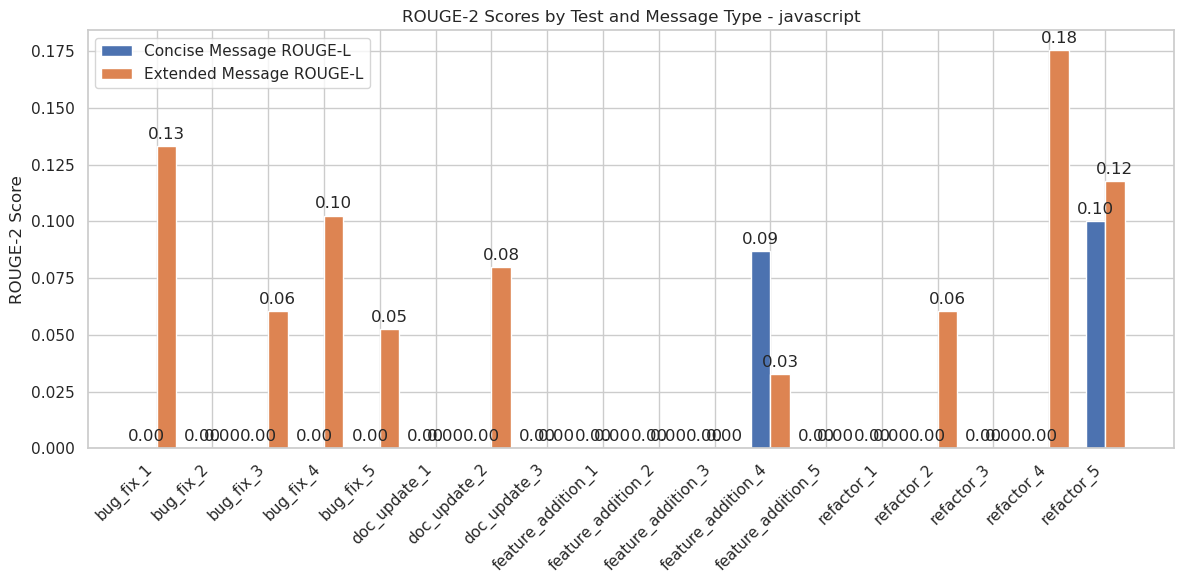

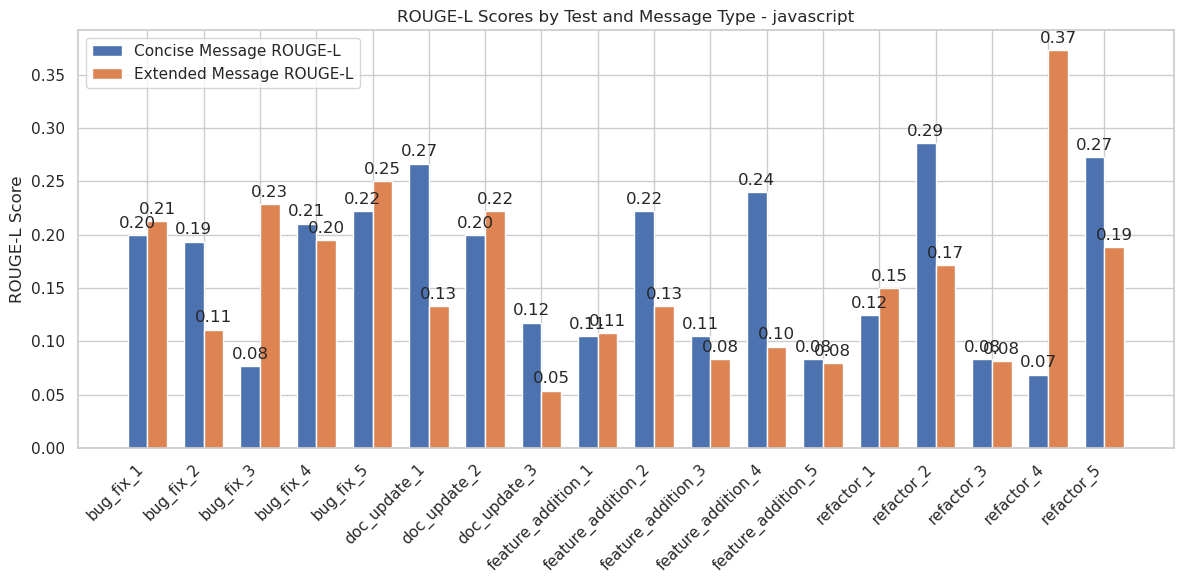

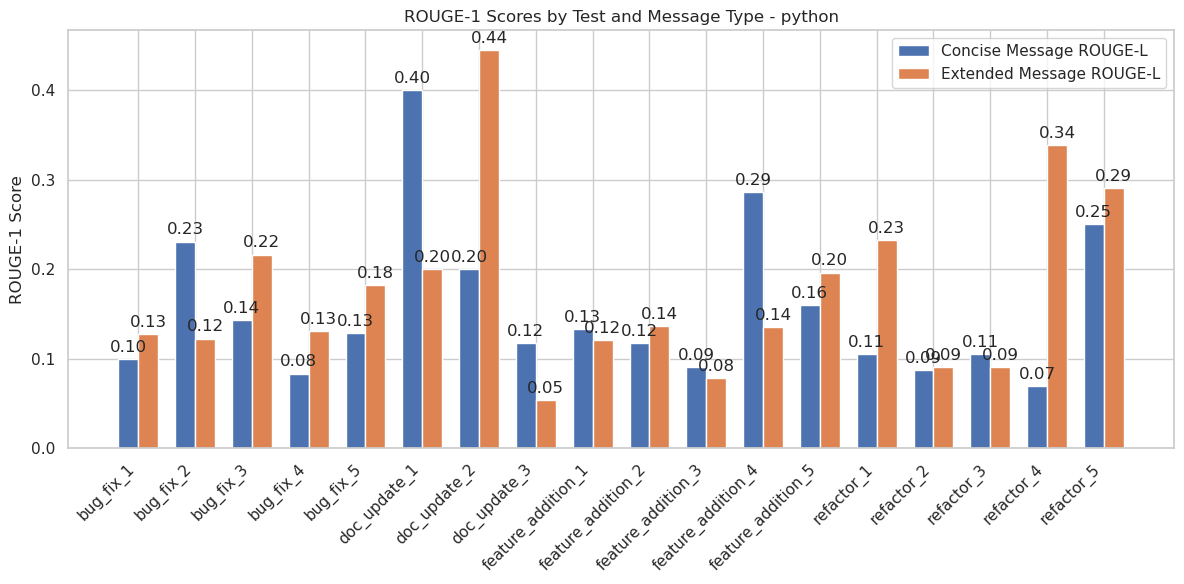

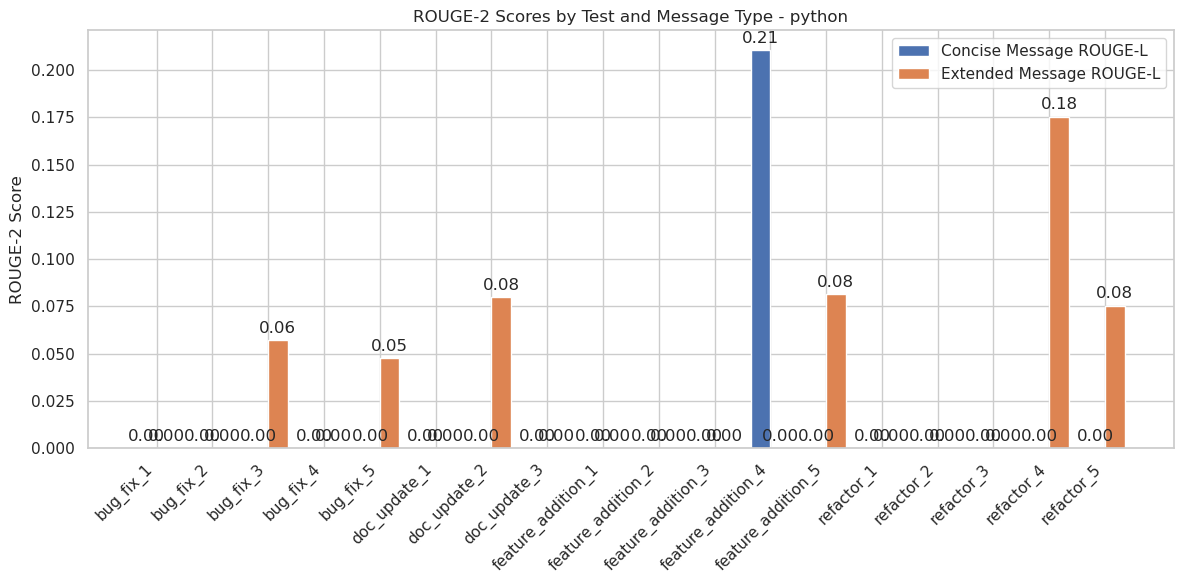

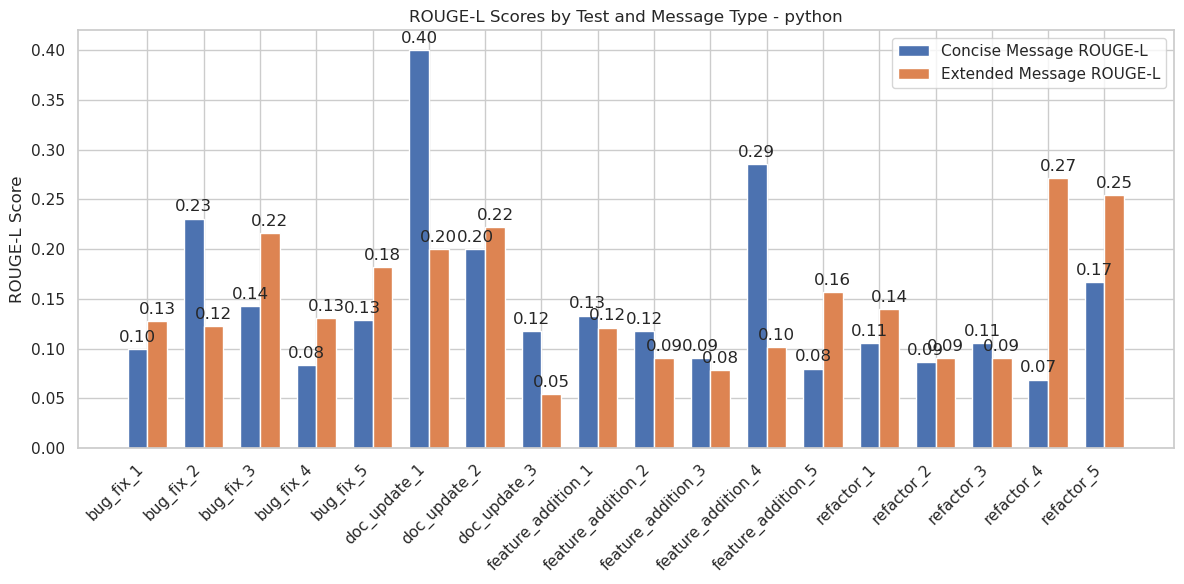

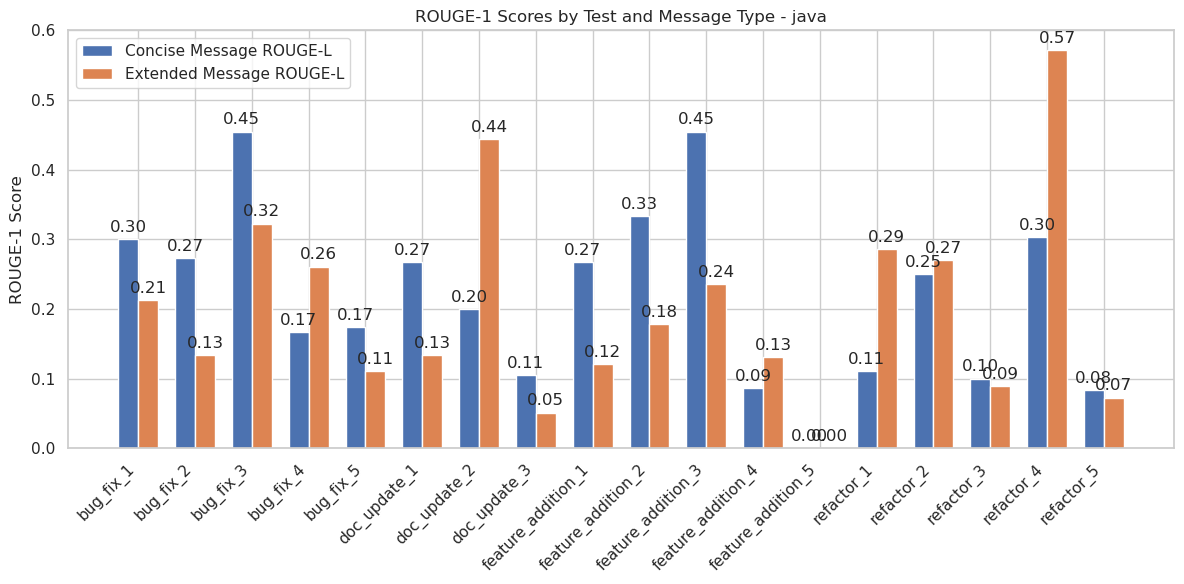

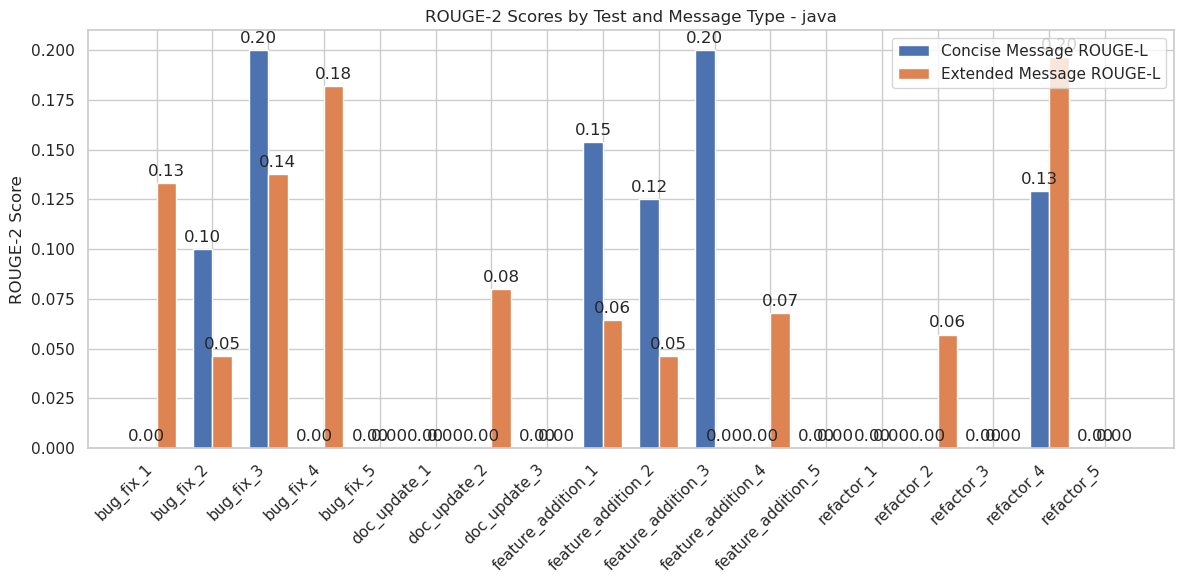

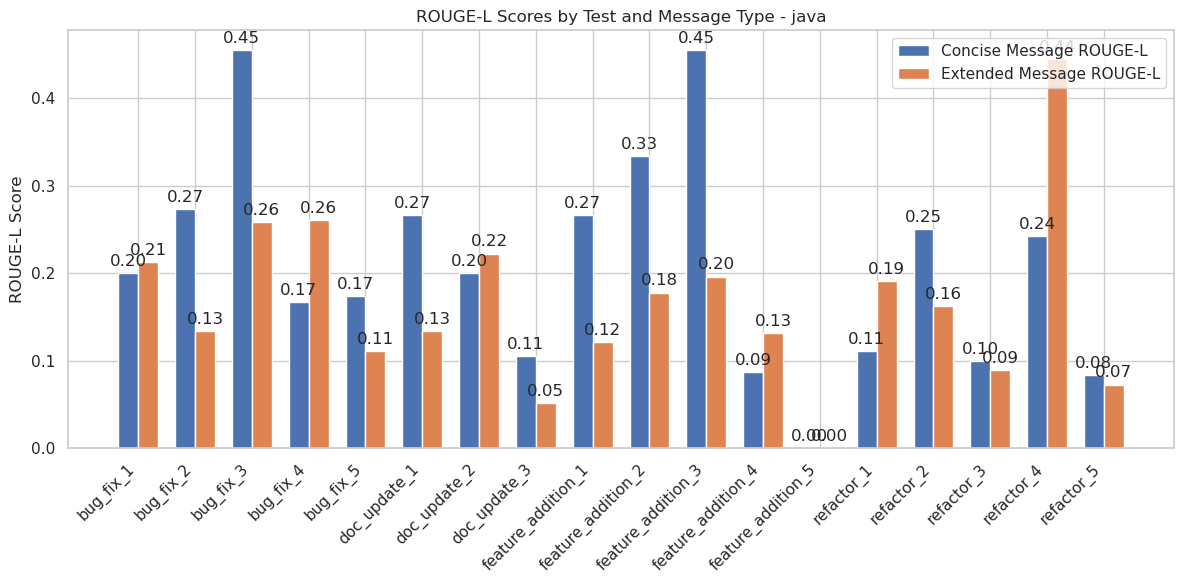

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    for df in [javascript_tests, python_tests, java_tests]:
        for test in ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']:
            # Shorten column names for ease
            # df = df.rename(columns={
            #     "concise msg ROUGE-L": "concise",
            #     "extended msg ROUGE-L": "extended"
            # })
            
            # Set up for plotting
            x = np.arange(len(df["test_name"]))  # label locations
            width = 0.35  # width of the bars
            
            fig, ax = plt.subplots(figsize=(12, 6))
            
            # Plot bars
            bars1 = ax.bar(x - width/2, df[f"concise msg {test}"], width, label='Concise Message ROUGE-L')
            bars2 = ax.bar(x + width/2, df[f"extended msg {test}"], width, label='Extended Message ROUGE-L')
            
    
            ax.set_ylabel(f'{test} Score')
            language = df['test_language'].iloc[0]
            ax.set_title(f'{test} Scores by Test and Message Type - {language}')
            ax.set_xticks(x)
            ax.set_xticklabels(df["test_name"], rotation=45, ha="right")
            ax.legend()
            
            def add_labels(bars):
                for bar in bars:
                    height = bar.get_height()
                    ax.annotate(f'{height:.2f}',
                                xy=(bar.get_x() + bar.get_width() / 2, height),
                                xytext=(0, 3),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')
            
            add_labels(bars1)
            add_labels(bars2)
            
            plt.tight_layout()
            plt.show()
except Exception as e:
    print(e)
    pass

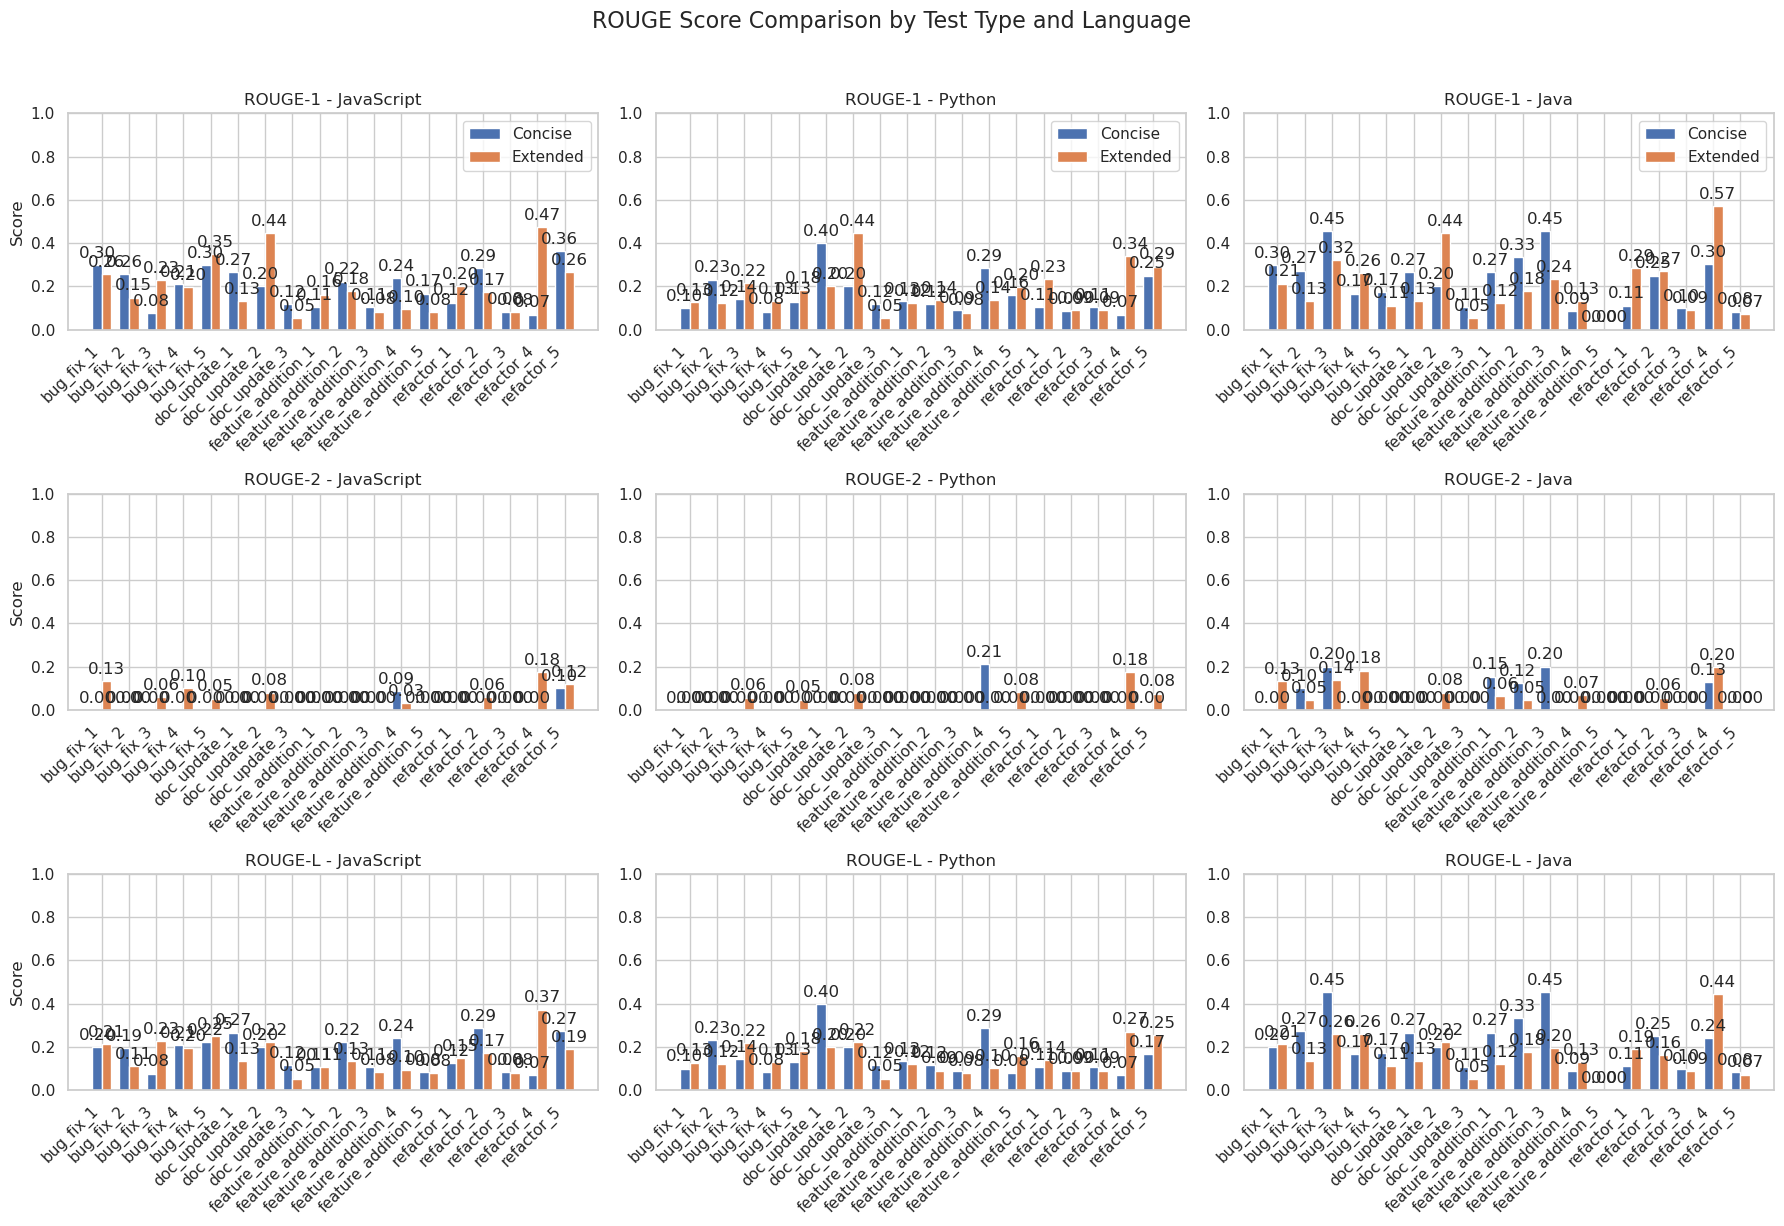

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define your test sets
datasets = [javascript_tests, python_tests, java_tests]
languages = ['JavaScript', 'Python', 'Java']
rouge_tests = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for col, df in enumerate(datasets):
    for row, test in enumerate(rouge_tests):
        ax = axs[row, col]
        
        x = np.arange(len(df["test_name"]))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, df[f"concise msg {test}"], width, label='Concise')
        bars2 = ax.bar(x + width/2, df[f"extended msg {test}"], width, label='Extended')
        
        ax.set_title(f'{test} - {languages[col]}')
        ax.set_xticks(x)
        ax.set_xticklabels(df["test_name"], rotation=45, ha="right")
        ax.set_ylim(0, 1)  
        if col == 0:
            ax.set_ylabel("Score")
        if row == 0:
            ax.legend(loc='upper right')

        def add_labels(bars):
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.2f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')
        
        add_labels(bars1)
        add_labels(bars2)

plt.suptitle("ROUGE Score Comparison by Test Type and Language", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


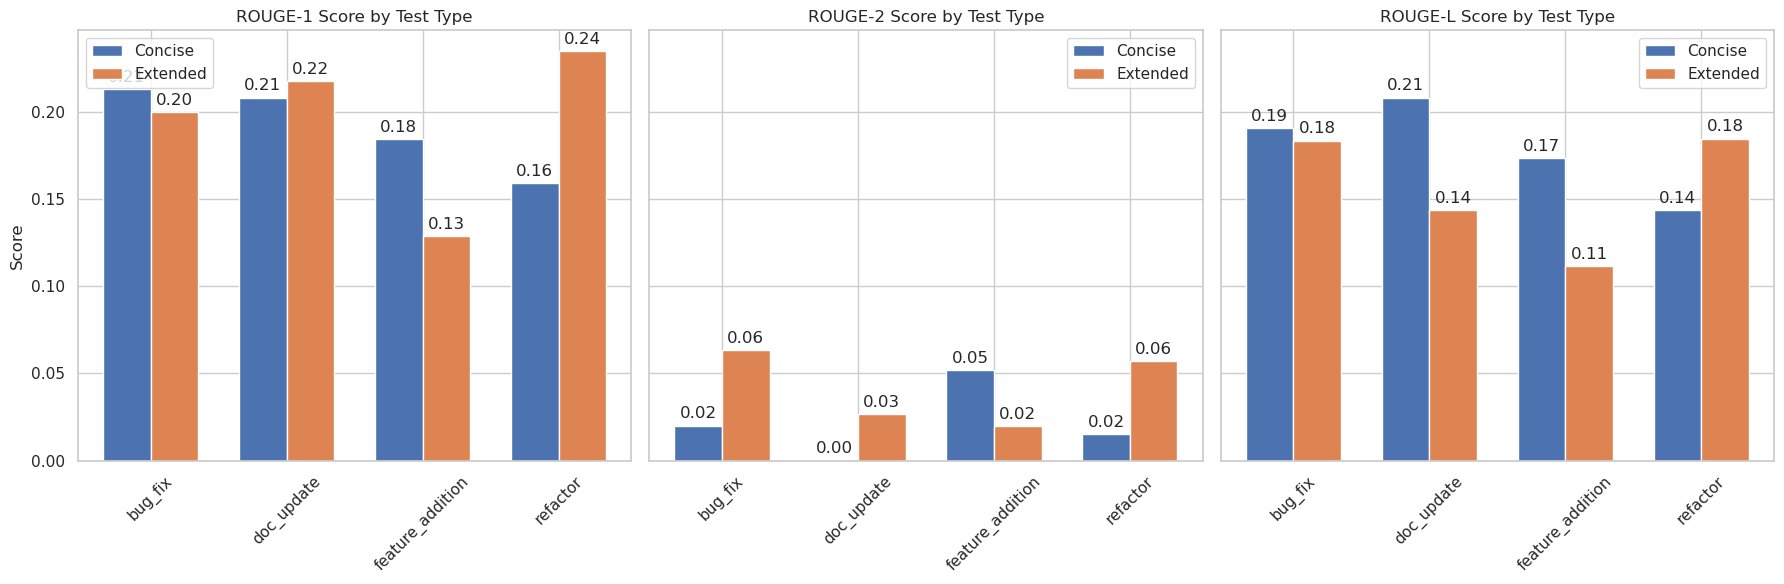

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df has the new 'test_type' column
grouped = df.groupby('test_type').mean(numeric_only=True)

# List of ROUGE metrics
rouge_metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

test_types = grouped.index.tolist()
x = np.arange(len(test_types))
width = 0.35

for i, metric in enumerate(rouge_metrics):
    ax = axes[i]
    
    concise_col = f'concise msg {metric}'
    extended_col = f'extended msg {metric}'
    
    concise_vals = grouped[concise_col]
    extended_vals = grouped[extended_col]
    
    bars1 = ax.bar(x - width/2, concise_vals, width, label='Concise')
    bars2 = ax.bar(x + width/2, extended_vals, width, label='Extended')
    
    ax.set_title(f'{metric} Score by Test Type')
    ax.set_xticks(x)
    ax.set_xticklabels(test_types, rotation=45)
    ax.set_ylabel('Score' if i == 0 else '')
    ax.legend()

    # Add labels
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)

plt.tight_layout()
plt.savefig('rouge-grouped-test_type.png')
plt.show()


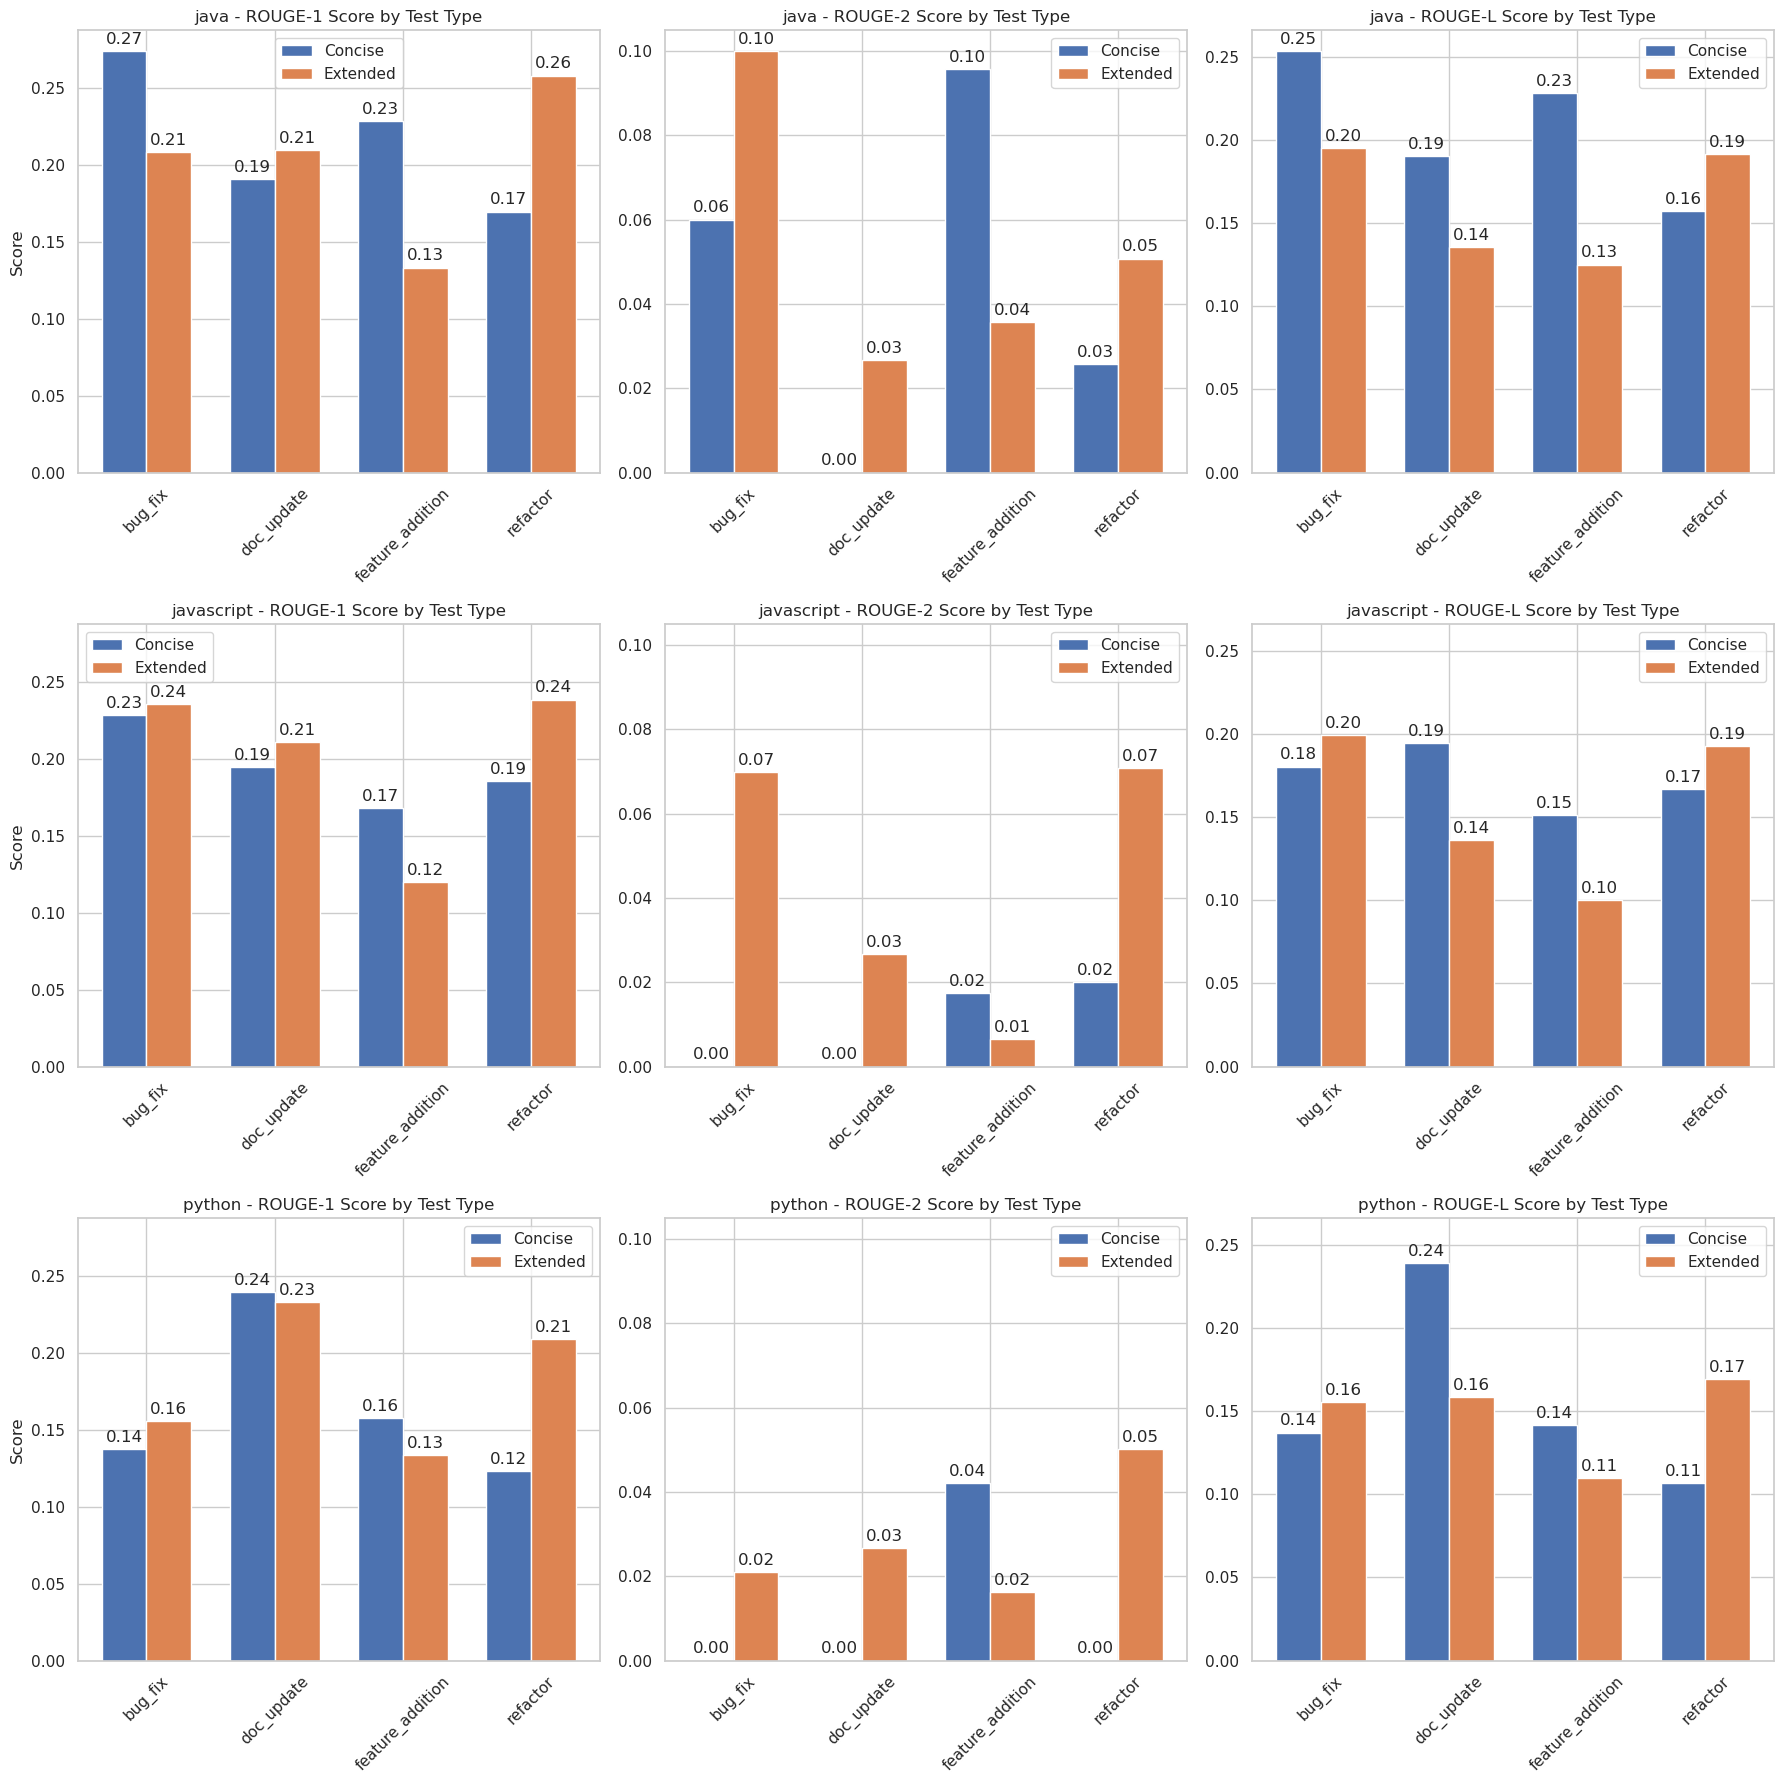

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Group by language + test_type and take mean
grouped = df.groupby(['test_language', 'test_type']).mean(numeric_only=True).reset_index()

# Get unique languages and test types
languages = grouped['test_language'].unique()
test_types = grouped['test_type'].unique()
x = np.arange(len(test_types))  # Position on x-axis
width = 0.35

# ROUGE metrics
rouge_metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']

# Set up subplots: 1 row per language, 1 column per ROUGE metric
fig, axes = plt.subplots(nrows=len(languages), ncols=3, figsize=(18, 6 * len(languages)), sharey='col')

for row_idx, language in enumerate(languages):
    lang_df = grouped[grouped['test_language'] == language]
    
    for col_idx, metric in enumerate(rouge_metrics):
        ax = axes[row_idx][col_idx] if len(languages) > 1 else axes[col_idx]
        
        concise_vals = lang_df[f'concise msg {metric}']
        extended_vals = lang_df[f'extended msg {metric}']

        bars1 = ax.bar(x - width/2, concise_vals, width, label='Concise')
        bars2 = ax.bar(x + width/2, extended_vals, width, label='Extended')

        ax.set_title(f'{language} - {metric} Score by Test Type')
        ax.set_xticks(x)
        ax.set_xticklabels(test_types, rotation=45)
        ax.set_ylabel('Score' if col_idx == 0 else '')
        ax.legend()

        # Add bar labels
        def add_labels(bars):
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.2f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')

        add_labels(bars1)
        add_labels(bars2)

plt.tight_layout()
plt.savefig('rouge-grouped-test_type.png')
plt.show()
